<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [119]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

El campo fecha esta siendo tomado como Object y no como date. Forzamos a que sea date para que la fecha no sea tomada como variable categorica

import datetime

def date_parser(d):
    try:
        d = datetime.datetime.strptime(d, "%d/%m/%Y")
    except ValueError:
        print ("error")
    return d

res = date_parser("20/12/2010")
print (res)

In [120]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(
    'merged_sales.csv',parse_dates = ["Date"] , date_parser = date_parser  )


melb_df[:20]

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Lattitude,Longtitude,Regionname,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,2016-12-03,3067.0,2.0,1.0,1.0,202.0,...,-37.7996,144.9984,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,2016-02-04,3067.0,2.0,1.0,0.0,156.0,...,-37.8079,144.9934,Northern Metropolitan,79.0,1900.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,2017-03-04,3067.0,3.0,2.0,0.0,134.0,...,-37.8093,144.9944,Northern Metropolitan,150.0,1900.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,2017-03-04,3067.0,3.0,2.0,1.0,94.0,...,-37.7969,144.9969,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,2016-06-04,3067.0,3.0,1.0,2.0,120.0,...,-37.8072,144.9941,Northern Metropolitan,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258
5,Abbotsford,2,h,941000.0,2016-05-07,3067.0,2.0,1.0,0.0,181.0,...,-37.8041,144.9953,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
6,Abbotsford,3,h,1876000.0,2016-05-07,3067.0,4.0,2.0,0.0,245.0,...,-37.8024,144.9993,Northern Metropolitan,210.0,1910.0,3067.0,130.624031,258.0,605.152174,2187.032258
7,Abbotsford,2,h,1636000.0,2016-10-08,3067.0,2.0,1.0,2.0,256.0,...,-37.8060,144.9954,Northern Metropolitan,107.0,1890.0,3067.0,130.624031,258.0,605.152174,2187.032258
8,Abbotsford,1,u,300000.0,2016-10-08,3067.0,1.0,1.0,1.0,0.0,...,-37.8008,144.9973,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
9,Abbotsford,2,h,1097000.0,2016-10-08,3067.0,3.0,1.0,2.0,220.0,...,-37.8010,144.9989,Northern Metropolitan,75.0,1900.0,3067.0,130.624031,258.0,605.152174,2187.032258


In [121]:
melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'BuildingArea', 'YearBuilt', 'zipcode',
       'airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')

In [122]:
melb_df.dtypes

Suburb                               object
Rooms                                 int64
Type                                 object
Price                               float64
Date                         datetime64[ns]
Postcode                            float64
Bedroom2                            float64
Bathroom                            float64
Car                                 float64
Landsize                            float64
CouncilArea                          object
Lattitude                           float64
Longtitude                          float64
Regionname                           object
BuildingArea                        float64
YearBuilt                           float64
zipcode                             float64
airbnb_price_mean                   float64
airbnb_record_count                 float64
airbnb_weekly_price_mean            float64
airbnb_monthly_price_mean           float64
dtype: object

In [123]:
melb_df.shape

(11524, 21)

El campo fecha esta siendo tomado como Object y no como date. Esto hace que la fecha sea tomada como una variable categórica y en consecuencia sea tomada por onehot encoder. Al momento de hacer el encodign, vamos a excluir a esta variable

In [124]:
# Ponemos este if por si corremos varias veces la celda. Si la celda se corre varias veces (haciendo pruebas),
# la segunda vez falla el drop por no tener las columnas que se eliminaron en la corrida previa
if 'BuildingArea' in melb_df.columns:
    
    melb_df_building_area_year_built = melb_df[['BuildingArea','YearBuilt']]
    melb_df = melb_df.drop(['BuildingArea','YearBuilt'] , axis = 1)

In [125]:
melb_df_building_area_year_built

,BuildingArea,YearBuilt
0,NaN,NaN
1,79.0,1900.0
2,150.0,1900.0
3,NaN,NaN
4,142.0,2014.0
...,...,...
11519,172.0,1980.0
11520,NaN,NaN
11521,NaN,1981.0
11522,133.0,1995.0


In [126]:
melb_df

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,2016-12-03,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,2016-02-04,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,2017-03-04,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,2017-03-04,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,2016-06-04,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,Werribee,4,h,635000.0,2017-08-26,3030.0,4.0,2.0,1.0,662.0,Point Cook,-37.89327,144.64789,Western Metropolitan,3030.0,115.748062,258.0,590.000000,2224.600000
11520,Westmeadows,3,h,582000.0,2017-08-26,3049.0,3.0,2.0,2.0,256.0,Westmeadows,-37.67917,144.89390,Northern Metropolitan,3049.0,92.285714,21.0,400.000000,NaN
11521,Wheelers Hill,4,h,1245000.0,2017-08-26,3150.0,4.0,2.0,2.0,652.0,Glen Waverley,-37.90562,145.16761,South-Eastern Metropolitan,3150.0,124.026455,189.0,526.350000,1901.611111
11522,Williamstown,3,h,1031000.0,2017-08-26,3016.0,3.0,2.0,2.0,333.0,Williamstown,-37.85927,144.87904,Western Metropolitan,3016.0,191.094595,74.0,612.250000,2119.750000


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [127]:
categorical_cols = ['Type']
numerical_cols = ['Rooms']

In [128]:
melb_df[categorical_cols].nunique()

Type    3
dtype: int64

In [129]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type    0
dtype: int64

# Utilizamos DictVectorizer

Excluimos el campo Date para que no sea tomado por el onehot encoder como variable categorica

In [130]:
#'Date'

feature_cols = ['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean']

feature_dict = list(melb_df[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'Suburb': 'Abbotsford',
  'Rooms': 2,
  'Type': 'h',
  'Price': 1480000.0,
  'Postcode': 3067.0,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 1.0,
  'Landsize': 202.0,
  'CouncilArea': 'Yarra',
  'Lattitude': -37.7996,
  'Longtitude': 144.9984,
  'Regionname': 'Northern Metropolitan',
  'zipcode': 3067.0,
  'airbnb_price_mean': 130.62403100775194,
  'airbnb_record_count': 258.0,
  'airbnb_weekly_price_mean': 605.1521739130435,
  'airbnb_monthly_price_mean': 2187.032258064516},
 {'Suburb': 'Abbotsford',
  'Rooms': 2,
  'Type': 'h',
  'Price': 1035000.0,
  'Postcode': 3067.0,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 0.0,
  'Landsize': 156.0,
  'CouncilArea': 'Yarra',
  'Lattitude': -37.8079,
  'Longtitude': 144.9934,
  'Regionname': 'Northern Metropolitan',
  'zipcode': 3067.0,
  'airbnb_price_mean': 130.62403100775194,
  'airbnb_record_count': 258.0,
  'airbnb_weekly_price_mean': 605.1521739130435,
  'airbnb_monthly_price_mean': 2187.032258064516}]

In [131]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [132]:
feature_matrix

<11524x522 sparse matrix of type '<class 'numpy.float64'>'
	with 207432 stored elements in Compressed Sparse Row format>

In [133]:
vec.get_feature_names()

['Bathroom',
 'Bedroom2',
 'Car',
 'CouncilArea=Abbotsford',
 'CouncilArea=Airport West',
 'CouncilArea=Albert Park',
 'CouncilArea=Alphington',
 'CouncilArea=Altona',
 'CouncilArea=Altona Meadows',
 'CouncilArea=Altona North',
 'CouncilArea=Armadale',
 'CouncilArea=Ascot Vale',
 'CouncilArea=Ashburton',
 'CouncilArea=Avondale Heights',
 'CouncilArea=Balwyn',
 'CouncilArea=Balwyn North',
 'CouncilArea=Banyule',
 'CouncilArea=Bayside',
 'CouncilArea=Bayswater',
 'CouncilArea=Beaumaris',
 'CouncilArea=Bentleigh',
 'CouncilArea=Bentleigh East',
 'CouncilArea=Berwick',
 'CouncilArea=Blackburn',
 'CouncilArea=Bonbeach',
 'CouncilArea=Boronia',
 'CouncilArea=Boroondara',
 'CouncilArea=Box Hill',
 'CouncilArea=Braybrook',
 'CouncilArea=Brighton',
 'CouncilArea=Brighton East',
 'CouncilArea=Brimbank',
 'CouncilArea=Broadmeadows',
 'CouncilArea=Brunswick',
 'CouncilArea=Brunswick East',
 'CouncilArea=Brunswick West',
 'CouncilArea=Bulleen',
 'CouncilArea=Bundoora',
 'CouncilArea=Burwood',
 'Cou

Notar que se esta haciendo el encoding de fechas. Quizas conviene a la fecha pasarla a un formato float.

In [134]:
# Fill nan values on sparse matrix.
if numpy.any(numpy.isnan(feature_matrix.data)):
  feature_matrix.data = numpy.nan_to_num(feature_matrix.data)

In [135]:
def convert_to_dense(feature_matrix , limit_size_mb = 10):
    # Before doing this type of conversion, it's mandatory to calculate the
    # size of the resulting matrix!
    matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
    print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

    precision_type = numpy.float32
    if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
      dense_feature_matrix = feature_matrix.astype(precision_type).todense()
    else:
      # We calculate how many rows would fit given the number of columns
      n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
      print("Matrix too big! Using only first {} of {} rows".format(
          n_rows, feature_matrix.shape[0]))
      dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

    print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))
    
    return dense_feature_matrix


In [136]:
dense_feature_matrix = convert_to_dense(feature_matrix = feature_matrix , limit_size_mb = 50)

The dense matrix will weight approximately 22.95 MB
Final size: 22.95


In [137]:
dense_feature_matrix.shape

(11524, 522)

In [138]:
melb_df = pandas.DataFrame(data = dense_feature_matrix , columns = vec.get_feature_names() )

In [139]:
# Parque hace falta esto? Ya chequeamos el sie
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] <= len(melb_df):
  melb_df = melb_df.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df = melb_df

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [140]:
# Este if lo ponemos para evitar pisar los datos si corremos varias veces la celda.
if not 'BuildingArea' in melb_df.columns:
    melb_df = melb_df.join (melb_df_building_area_year_built)
melb_df

,Bathroom,Bedroom2,Car,CouncilArea=Abbotsford,CouncilArea=Airport West,CouncilArea=Albert Park,CouncilArea=Alphington,CouncilArea=Altona,CouncilArea=Altona Meadows,CouncilArea=Altona North,...,Type=h,Type=t,Type=u,airbnb_monthly_price_mean,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,zipcode,BuildingArea,YearBuilt
0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,NaN,NaN
1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,79.0,1900.0
2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,150.0,1900.0
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,NaN,NaN
4,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2224.600098,115.748062,258.0,590.000000,3030.0,172.0,1980.0
11520,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,92.285713,21.0,400.000000,3049.0,NaN,NaN
11521,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1901.611084,124.026459,189.0,526.349976,3150.0,NaN,1981.0
11522,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2119.750000,191.094589,74.0,612.250000,3016.0,133.0,1995.0


In [141]:
(melb_df.isna().sum() > 0 ).sum() 
#Existen dos columnas que tienen na

2

In [142]:
melb_df.isna().sum()

Bathroom                       0
Bedroom2                       0
Car                            0
CouncilArea=Abbotsford         0
CouncilArea=Airport West       0
                            ... 
airbnb_record_count            0
airbnb_weekly_price_mean       0
zipcode                        0
BuildingArea                5481
YearBuilt                   4552
Length: 524, dtype: int64

In [143]:
#Obtenemos todas las columnas que son numéricas
melb_df_tmp = melb_df.select_dtypes(include=numpy.number)

In [144]:
#Sacamos del data set la columna Y (Price). 
melb_df_tmp = melb_df_tmp.drop('Price', axis = 1)

In [145]:

columns = melb_df_tmp.select_dtypes(include=numpy.number).columns.tolist()
columns

['Bathroom',
 'Bedroom2',
 'Car',
 'CouncilArea=Abbotsford',
 'CouncilArea=Airport West',
 'CouncilArea=Albert Park',
 'CouncilArea=Alphington',
 'CouncilArea=Altona',
 'CouncilArea=Altona Meadows',
 'CouncilArea=Altona North',
 'CouncilArea=Armadale',
 'CouncilArea=Ascot Vale',
 'CouncilArea=Ashburton',
 'CouncilArea=Avondale Heights',
 'CouncilArea=Balwyn',
 'CouncilArea=Balwyn North',
 'CouncilArea=Banyule',
 'CouncilArea=Bayside',
 'CouncilArea=Bayswater',
 'CouncilArea=Beaumaris',
 'CouncilArea=Bentleigh',
 'CouncilArea=Bentleigh East',
 'CouncilArea=Berwick',
 'CouncilArea=Blackburn',
 'CouncilArea=Bonbeach',
 'CouncilArea=Boronia',
 'CouncilArea=Boroondara',
 'CouncilArea=Box Hill',
 'CouncilArea=Braybrook',
 'CouncilArea=Brighton',
 'CouncilArea=Brighton East',
 'CouncilArea=Brimbank',
 'CouncilArea=Broadmeadows',
 'CouncilArea=Brunswick',
 'CouncilArea=Brunswick East',
 'CouncilArea=Brunswick West',
 'CouncilArea=Bulleen',
 'CouncilArea=Bundoora',
 'CouncilArea=Burwood',
 'Cou

In [146]:
from sklearn.preprocessing import MinMaxScaler
#Escalamos todos los valores
scaler = MinMaxScaler()
melb_df_tmp = pandas.DataFrame(scaler.fit_transform(melb_df_tmp), columns = columns)

In [147]:
melb_df_tmp

,Bathroom,Bedroom2,Car,CouncilArea=Abbotsford,CouncilArea=Airport West,CouncilArea=Albert Park,CouncilArea=Alphington,CouncilArea=Altona,CouncilArea=Altona Meadows,CouncilArea=Altona North,...,Type=h,Type=t,Type=u,airbnb_monthly_price_mean,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,zipcode,BuildingArea,YearBuilt
0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,NaN,NaN
1,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.011633,0.297619
2,0.666667,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.022088,0.297619
3,0.666667,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,NaN,NaN
4,0.333333,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.020910,0.976190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,0.666667,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.221133,0.152484,0.076626,0.263785,0.761881,0.025328,0.773810
11520,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.121575,0.006237,0.178838,0.766658,NaN,NaN
11521,0.666667,1.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.189027,0.163390,0.056133,0.235328,0.792054,NaN,0.779762
11522,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.210711,0.251744,0.021978,0.273733,0.758361,0.019585,0.863095


In [148]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df_tmp.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor() , verbose= 0 , max_iter = 20 , n_nearest_features = 1 )
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [149]:
melb_data_mice

,Bathroom,Bedroom2,Car,CouncilArea=Abbotsford,CouncilArea=Airport West,CouncilArea=Albert Park,CouncilArea=Alphington,CouncilArea=Altona,CouncilArea=Altona Meadows,CouncilArea=Altona North,...,Type=h,Type=t,Type=u,airbnb_monthly_price_mean,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,zipcode,BuildingArea,YearBuilt
0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.035164,0.716667
1,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.011633,0.297619
2,0.666667,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.022088,0.297619
3,0.666667,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.035164,0.716667
4,0.333333,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.020910,0.976190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,0.666667,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.221133,0.152484,0.076626,0.263785,0.761881,0.025328,0.773810
11520,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.121575,0.006237,0.178838,0.766658,0.035164,0.716667
11521,0.666667,1.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.189027,0.163390,0.056133,0.235328,0.792054,0.023973,0.779762
11522,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.210711,0.251744,0.021978,0.273733,0.758361,0.019585,0.863095


In [150]:
#Volvemos las columas a su escala original
melb_data_mice = pandas.DataFrame(scaler.inverse_transform(melb_data_mice), columns = columns)

In [151]:
melb_data_mice

,Bathroom,Bedroom2,Car,CouncilArea=Abbotsford,CouncilArea=Airport West,CouncilArea=Albert Park,CouncilArea=Alphington,CouncilArea=Altona,CouncilArea=Altona Meadows,CouncilArea=Altona North,...,Type=h,Type=t,Type=u,airbnb_monthly_price_mean,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,zipcode,BuildingArea,YearBuilt
0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,238.8,1970.4
1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,79.0,1900.0
2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,150.0,1900.0
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,238.8,1970.4
4,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2224.600098,115.748062,258.0,590.000000,3030.0,172.0,1980.0
11520,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,92.285713,21.0,400.000000,3049.0,238.8,1970.4
11521,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1901.611084,124.026459,189.0,526.349976,3150.0,162.8,1981.0
11522,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2119.750000,191.094589,74.0,612.250000,3016.0,133.0,1995.0


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

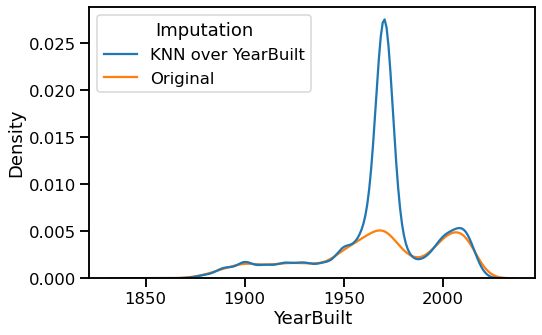

In [152]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

Notar que cambia el grafico respecto a como esta planteado el ejercicio originalmente. En nuestro caso, nosotos tomamos todas las feaetures de tipo numerico para que se haga la estimacion de YearBuilt y BuildingArea. Como esta planteado en el práctico, se toman unicamente YearBuilt y BuildingArea para hacer la estimación de los valores faltantes. 

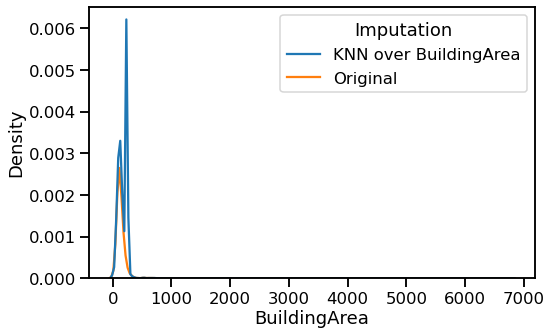

In [153]:
mice_year_built_area = melb_data_mice.BuildingArea.to_frame()
mice_year_built_area['Imputation'] = 'KNN over BuildingArea'
melb_year_build_area = melb_df.BuildingArea.dropna().to_frame()
melb_year_build_area['Imputation'] = 'Original'
data_area = pandas.concat([mice_year_built_area, melb_year_build_area])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data_area, x='BuildingArea', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Se deben estandarizar las features, para ello se pede utilizar el StandarScaler. 

Ref: https://stackoverflow.com/questions/37221425/which-feature-scaling-method-to-use-before-pca

Ref: https://www.researchgate.net/post/Is-it-necessary-to-normalize-data-before-performing-principle-component-analysis

Ref: https://www.youtube.com/watch?v=qtaqvPAeEJY

Ref: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

Ref: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Si se deben estandarizar las variables puesto que PCA es sensible a la varianza de las variales. Esto singifica que las variables con mayor varianza van a dominar sobre las de menor varianza. Con lo cual variables que tengan mayor rango van a dominar sobre las de menor rango. Una variable que se mueve en el rango de 0 a 100, va a dominar sobre una que se mueva en el rango de 0 a 1

Notar que PCA calcula los eigen valores y eigen vectores de la matriz de correlazión, y recordando la forumla de covarianza :

$cov_{x,y}=\frac{\ sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

Se puede ver que si las variables estan en diferentes rangos, van a tener un impacto sobre la matriz de covarianza.

Notar que para en este caso vamos a escalar con *StandarScaler* y no *MinMaxScaler*. 

Ref: https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler/51237727

In [164]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

n_components = 20

pca_estimator = PCA(n_components=n_components) 

pca_pipe_line = make_pipeline(StandardScaler(), pca_estimator)

result = pca_pipe_line.fit_transform(melb_data_mice)
result



array([[-0.2261036 , -1.91118162, -2.21610654, ..., -0.01821994,
        -0.07123913, -0.53034756],
       [-0.56252978, -2.41390313, -2.31175895, ...,  0.09258161,
        -0.17978793, -0.58815442],
       [ 0.05095113, -1.46999081, -2.05730941, ..., -0.02303306,
        -0.14675115, -0.52791869],
       ...,
       [ 0.82252831,  5.38117902, -0.01692409, ..., -1.1812825 ,
        -2.66948087, -3.35210845],
       [ 1.69692999, -0.53231714,  3.13382279, ...,  3.49522229,
         0.14299849,  0.80940649],
       [ 1.77655149, -0.96222732,  2.86806977, ..., -2.37021847,
         0.9821181 ,  0.35880585]])

In [167]:
print(pca_estimator.explained_variance_ratio_)

[0.01184002 0.00996704 0.00716504 0.00619029 0.00578298 0.00549979
 0.00539817 0.00508106 0.00489867 0.00447392 0.00441527 0.00418697
 0.00415096 0.00406603 0.00392564 0.00389558 0.00385809 0.00383469
 0.00381592 0.00378836]


Text(0.5, 1.0, 'Porcentaje de varianza capturada por cada componente')

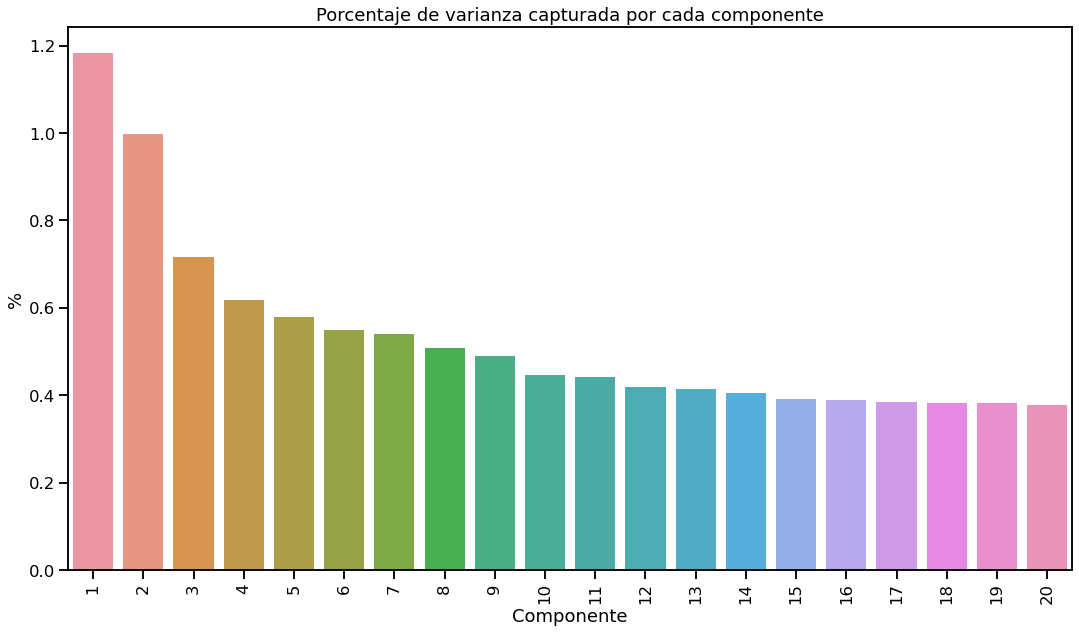

In [182]:
fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

seaborn.barplot(ax = axes , x=list(range(1, n_components + 1)), y=pca_estimator.explained_variance_ratio_ * 100 )
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.set_xlabel('Componente')
axes.set_ylabel('%')
axes.set_title('Porcentaje de varianza capturada por cada componente')

Text(0.5, 1.0, 'Porcentaje de varianza capturada por cada componente')

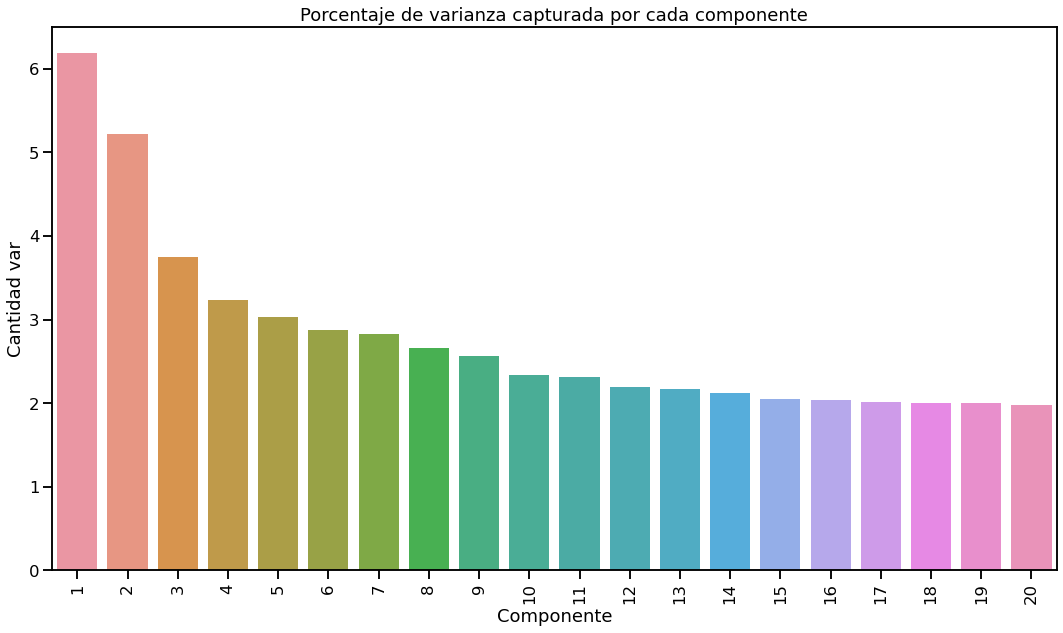

In [183]:
fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

seaborn.barplot(ax = axes , x=list(range(1, n_components + 1)), y=pca_estimator.explained_variance_ )
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.set_xlabel('Componente')
axes.set_ylabel('Cantidad var')
axes.set_title('Porcentaje de varianza capturada por cada componente')

Hacemos el mismo ejercicio, pero en vez de indicar la cantidad de componentes principales, indicamos que porcentaje de variabilidad queremos conservar

In [191]:
pca_estimator_porc = PCA(.95) 


pca_pipe_line_porc = make_pipeline(StandardScaler(), pca_estimator_porc)

result_porc = pca_pipe_line_porc.fit_transform(melb_data_mice)
result_porc

#melb_data_mice_standarized = pandas.DataFrame(pca_estimator.fit_transform(melb_data_mice), columns = columns)



array([[-0.22627301, -1.91259041, -2.21454251, ...,  0.1060142 ,
         0.59457435,  0.01664577],
       [-0.56280759, -2.41539122, -2.31231771, ..., -0.04488504,
        -0.13368479,  0.0743112 ],
       [ 0.05079207, -1.47140717, -2.05791829, ..., -0.1415648 ,
        -0.73750566,  0.07039782],
       ...,
       [ 0.82270022,  5.38138209, -0.01072699, ..., -0.07952748,
        -0.30867427, -0.17797041],
       [ 1.69765314, -0.53165115,  3.15267863, ...,  0.02591183,
        -0.08927606,  0.08861727],
       [ 1.77649749, -0.96229828,  2.86210592, ..., -0.09446038,
        -0.43266136, -0.03962655]])

In [188]:
print(f"Cantidad de features para un 95% {pca_estimator_porc.explained_variance_ratio_.shape[0]}")
print (f"Cantidad de features totales {melb_data_mice.shape[1]}")

Cantidad de features para un 95% 410
Cantidad de features totales 523


ValueError: Grouper for '1' not 1-dimensional

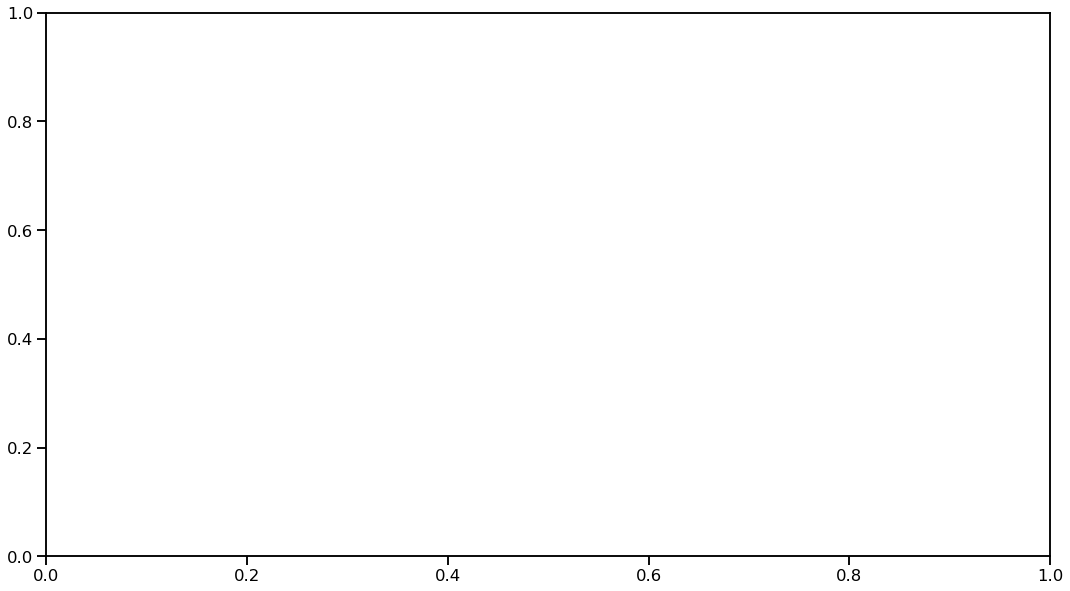

In [190]:
fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

#list(range(1, pca_estimator_porc.explained_variance_ratio_.shape[0])
     
seaborn.barplot(ax = axes , x=[1,2,3,4,5,6], y=pca_estimator_porc.explained_variance_ratio_ * 100 )
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.set_xlabel('Componente')
axes.set_ylabel('%')
axes.set_title('Porcentaje de varianza capturada por cada componente')

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


# Anexo Pruebas

https://www.youtube.com/watch?v=WPiYOS3qK70

In [ ]:
test_df = pandas.DataFrame({
    'age' : [25,27,29,31,33,numpy.nan],
    'experiencie' : [numpy.nan, 3,5,7,9,11],
    'salary' : [50, numpy.nan, 110,140,170,200],
    'purchased' : [0,1,1,0,1,0]
    
    
})

test_df

In [ ]:
X = df.drop('purchased' , axis =1)

test_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor() , verbose= 10 , max_iter = 20 , n_nearest_features = 2 )


#test_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(n_neighbors=5))
test_imputer.fit_transform(
    test_df[['age', 'experiencie' ]])

In [ ]:
test_df_1

In [ ]:
test_imputer1 = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
test_df_2 = mice_imputer.fit_transform(
    test_df['age'])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
imp = IterativeImputer(estimator = lr, verbose = 2, max_iter =1, tol=1e-10, imputation_order='roman')